In [186]:
import mglearn
from fontTools.misc.cython import returns
from matplotlib.pyplot import legend

In [187]:
X, y = mglearn.datasets.make_forge()
print(X)
print(y)

[[ 9.96346605  4.59676542]
 [11.0329545  -0.16816717]
 [11.54155807  5.21116083]
 [ 8.69289001  1.54322016]
 [ 8.1062269   4.28695977]
 [ 8.30988863  4.80623966]
 [11.93027136  4.64866327]
 [ 9.67284681 -0.20283165]
 [ 8.34810316  5.13415623]
 [ 8.67494727  4.47573059]
 [ 9.17748385  5.09283177]
 [10.24028948  2.45544401]
 [ 8.68937095  1.48709629]
 [ 8.92229526 -0.63993225]
 [ 9.49123469  4.33224792]
 [ 9.25694192  5.13284858]
 [ 7.99815287  4.8525051 ]
 [ 8.18378052  1.29564214]
 [ 8.7337095   2.49162431]
 [ 9.32298256  5.09840649]
 [10.06393839  0.99078055]
 [ 9.50048972 -0.26430318]
 [ 8.34468785  1.63824349]
 [ 9.50169345  1.93824624]
 [ 9.15072323  5.49832246]
 [11.563957    1.3389402 ]]
[1 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0]


X shape: (26, 2)


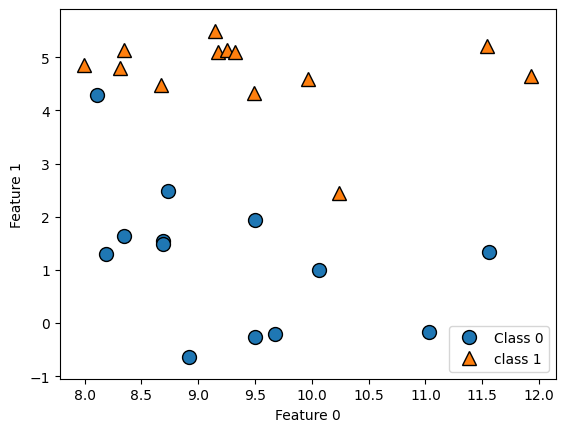

In [188]:
import matplotlib.pyplot as plt
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.legend(["Class 0", "class 1"], loc=4)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
print("X shape: {}".format(X.shape))

Text(0, 0.5, 'target')

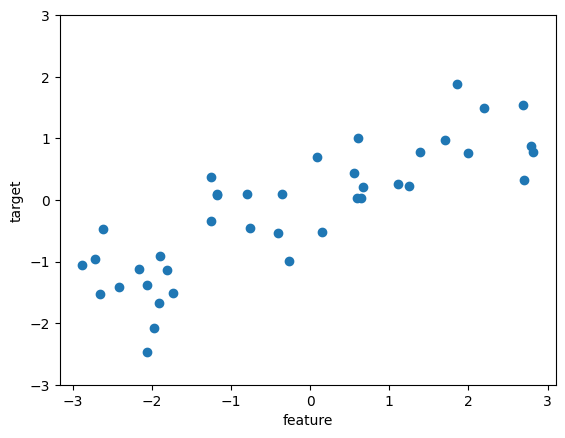

In [189]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("feature")
plt.ylabel("target")

# The Wisconsin Breast cancer dataset

In [190]:
from sklearn.datasets import load_breast_cancer
import numpy as np
cancer = load_breast_cancer()
print("cancer keys: \n{}".format(cancer.keys()) )

cancer keys: 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [191]:
print("shape of cancer data, {}".format(cancer.data.shape))

shape of cancer data, (569, 30)


In [192]:
print(f"Sample counts per class:\n{ {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))} }")

Sample counts per class:
{np.str_('malignant'): np.int64(212), np.str_('benign'): np.int64(357)}


# The student exam scores dataset

In [193]:
import pandas as pd
results = pd.read_csv(filepath_or_buffer='data/student_exam_scores.csv')
print(results.columns)
print(results)

Index(['student_id', 'hours_studied', 'sleep_hours', 'attendance_percent',
       'previous_scores', 'exam_score'],
      dtype='object')
    student_id  hours_studied  sleep_hours  attendance_percent  \
0         S001            8.0          8.8                72.1   
1         S002            1.3          8.6                60.7   
2         S003            4.0          8.2                73.7   
3         S004            3.5          4.8                95.1   
4         S005            9.1          6.4                89.8   
..         ...            ...          ...                 ...   
195       S196           10.5          5.4                94.0   
196       S197            7.1          6.1                85.1   
197       S198            1.6          6.9                63.8   
198       S199           12.0          7.3                50.5   
199       S200           10.2          6.3                97.4   

     previous_scores  exam_score  
0                 45        30.2  

In [194]:
results['standardized_score']= (results['exam_score']/51.3)*100

In [195]:
def get_grade(percentage: float) -> str:
    # Determine the grade
    if percentage >= 90:
        return "A"
    elif percentage >= 80:
        return "B"
    elif percentage >= 70:
        return "C"
    elif percentage >= 60:
        return "D"
    else:
        return "F"

In [196]:
results['grade'] = results['standardized_score'].apply(get_grade)

In [197]:
print(results.head(5))

  student_id  hours_studied  sleep_hours  attendance_percent  previous_scores  \
0       S001            8.0          8.8                72.1               45   
1       S002            1.3          8.6                60.7               55   
2       S003            4.0          8.2                73.7               86   
3       S004            3.5          4.8                95.1               66   
4       S005            9.1          6.4                89.8               71   

   exam_score  standardized_score grade  
0        30.2           58.869396     F  
1        25.0           48.732943     F  
2        35.8           69.785575     D  
3        34.0           66.276803     D  
4        40.3           78.557505     C  


In [198]:
from sklearn.model_selection import train_test_split
X = results[['hours_studied', 'sleep_hours', 'attendance_percent', 'previous_scores', 'previous_scores']]
y = results['grade']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=39)

In [199]:
# print("X_train{}".format(X_train))
print("y_train\n{}".format(len(y_train)))

y_train
150


In [200]:
print(len(X_train))

150


In [201]:
from sklearn.neighbors import KNeighborsClassifier
kcl = KNeighborsClassifier( n_neighbors = 5).fit(X_train, y_train)

In [202]:
print("Model accuracy is: {}".format(kcl.score(X_test, y_test)))

Model accuracy is: 0.44


In [203]:
scores = []
neighbours = range(1, 20, 1)
for neighbour in neighbours:
    kcl = KNeighborsClassifier(n_neighbors=neighbour).fit(X_train, y_train)
    scores.append(kcl.score(X_test, y_test))

print(scores)

[0.42, 0.38, 0.34, 0.34, 0.44, 0.32, 0.34, 0.34, 0.38, 0.38, 0.34, 0.36, 0.36, 0.34, 0.28, 0.32, 0.32, 0.32, 0.3]


## using linear regresssion

In [204]:
X = results[['hours_studied', 'sleep_hours', 'attendance_percent', 'previous_scores', 'previous_scores']]
y = results['exam_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=39)

In [205]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train, y_train)

In [206]:
print(lr.score(X_test, y_test))

0.8543500441346193


## using knn regrssion

In [207]:
from sklearn.neighbors import KNeighborsRegressor
kr = KNeighborsRegressor(n_neighbors=2).fit(X_train, y_train)

In [208]:
print(kr.score(X_test, y_test))

0.4442624237209407


seems to be low trying to find the sweet spot in n_neighbours

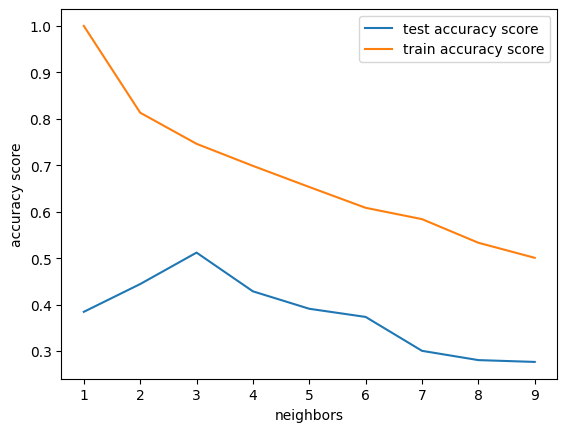

In [209]:
import matplotlib.pyplot as plt
test_accuracy_score = []
train_accuracy_score = []
neighbours = range(1,10,1)
for neighbour in neighbours:
    kr = KNeighborsRegressor(n_neighbors= neighbour).fit(X_train, y_train)
    test_accuracy_score.append(kr.score(X_test, y_test))
    train_accuracy_score.append(kr.score(X_train, y_train))

plt.plot(neighbours, test_accuracy_score, label= 'test accuracy score')
plt.plot(neighbours, train_accuracy_score, label= 'train accuracy score')
plt.xlabel('neighbors')
plt.ylabel('accuracy score')
plt.legend()
plt.show()


In [210]:
from mglearn.datasets import load_boston
boston_dataset = load_boston()

In [211]:
print(boston_dataset['target'])

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

In [212]:
print(boston_dataset.keys())

dict_keys(['data', 'target'])


In [213]:
print(boston_dataset['data'][1:4])

[[2.7310e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 6.4210e+00
  7.8900e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 3.9690e+02
  9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 7.1850e+00
  6.1100e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 3.9283e+02
  4.0300e+00]
 [3.2370e-02 0.0000e+00 2.1800e+00 0.0000e+00 4.5800e-01 6.9980e+00
  4.5800e+01 6.0622e+00 3.0000e+00 2.2200e+02 1.8700e+01 3.9463e+02
  2.9400e+00]]


In [214]:
X = boston_dataset['data']
y = boston_dataset['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4)

In [215]:
from sklearn.linear_model import Ridge
rr = Ridge().fit(X_train, y_train)

In [216]:
print(rr.score(X_test, y_test))

0.7262171673459974


In [219]:
appointment = pd.read_csv(filepath_or_buffer='data/KaggleV2-May-2016.csv')
print(appointment.keys())
print(appointment.head(3))

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')
      PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.262962e+12        5642549      F  2016-04-29T16:19:04Z   

         AppointmentDay  Age    Neighbourhood  Scholarship  Hipertension  \
0  2016-04-29T00:00:00Z   62  JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56  JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62    MATA DA PRAIA            0             0   

   Diabetes  Alcoholism  Handcap  SMS_received No-show  
0         0           0        0             0      No  
1         0           0        0             0      No  
2         0           0        0  

In [233]:
appointment['Gender'] = appointment['Gender'].apply(lambda x: 1 if x == 'M' else 0)
X = appointment[['PatientId', 'Gender', 'ScheduledDay',
                 'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
                 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received']]
y = appointment['No-show']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [234]:
kcl = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)

ValueError: could not convert string to float: '2016-05-18T09:05:12Z'